# Abstract

This document describes a tutorial on building a neural network model for classifying handwritten digits using the TMNIST dataset.

# Datasets

TMNIST stands out as a database providing a distinctive perspective on the well-established MNIST database, renowned for its application in handwritten digit classification. MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

In this dataset, the first row contains column headers ['names', 'labels','1','2',…..'784'], the 'names' column contains font file names such as 'Acme-Regular' and 'ZillaSlab-Bold', the 'labels' column contains characters such as '@','E' or '+', the remaining 784 columns contain the grayscale pixel values for the image of the corresponding character in the 'name' font-style.

Enclosed within a singular file named "TMNIST_Data.csv," this dataset contains over 281,000 images and is part of the Warhol.ai Computational Creativity and Cognitive Type projects.

Kaggle Link: https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters/


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
# Importing and reading the data
import pandas as pd
data_path = "/content/drive/MyDrive/Neural Network/94_character_TMNIST.csv"
data = pd.read_csv(data_path)


In [10]:
data

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,BalooChettan2-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274089,Prompt-ExtraBoldItalic,<,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274090,FiraSansCondensed-ThinItalic,z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274091,GothicA1-Bold,~,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Seperating the features and targets

from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = data.drop(['names','labels'], axis=1)
y = data['labels']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pre Processing the data

In [12]:
#Importing libraries for a neural network

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
# Preprocess data (normalize pixel values)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape image data (assuming 28x28 images)
X_train = X_train.to_numpy().reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], 28, 28, 1)






**Normalization:**

 The code converts the pixel values in X_train and X_test from integers (likely between 0 and 255) to floats between 0 and 1. This normalization is a common practice in image classification tasks to improve model performance.

**Reshaping:**

The code reshapes the image data from potentially flat arrays  into a format suitable for CNNs. It assumes the images are of size 28x28 pixels and adds an extra dimension at the end to represent the color channel (even though MNIST images are grayscale). This final shape becomes (number of images, 28, 28, 1).

In [13]:
import pandas as pd  # Import pandas for label conversion
from sklearn.preprocessing import LabelEncoder

# Convert letter-based labels to numerical indices
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use same mapping for consistency

# One-hot encode numerical labels
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

Label encoding converts the labels from strings to numerical indices, making them suitable for mathematical operations used in machine learning algorithms.


One-hot encoding creates a sparse representation of the labels, which can be beneficial for certain neural network architectures.

# Creating the Convolutional Neural Network model

  It's a specific type of artificial neural network architecture particularly well-suited for image recognition and classification tasks.

  **Structure:**

Unlike standard neural networks that process data in a single layer, CNNs have a layered structure inspired by the visual cortex of the human brain.

Convolutional layers: These layers apply filters (kernels) to the input image, extracting features like edges, shapes, and patterns. The filters slide across the image, detecting these features at different locations.

Pooling layers: These layers downsample the output from the convolutional layers, reducing the computational cost and preventing overfitting. Techniques like max pooling select the maximum value within a specific window, summarizing the essential features.

Fully connected layers: In the final stages, the CNN uses fully connected layers similar to traditional neural networks. These layers combine the extracted features from previous layers and classify the image into a specific category (e.g., digit 0, digit 1, etc.).

In [14]:
# Define the CNN model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dense(94, activation='softmax')  # 94 classes for TMNIST Alphabet
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
6853/6853 [==============================] - 151s 22ms/step - loss: 0.4575 - accuracy: 0.8711 - val_loss: 0.2926 - val_accuracy: 0.9135
Epoch 2/10
6853/6853 [==============================] - 148s 22ms/step - loss: 0.2530 - accuracy: 0.9215 - val_loss: 0.2546 - val_accuracy: 0.9230
Epoch 3/10
6853/6853 [==============================] - 147s 21ms/step - loss: 0.2066 - accuracy: 0.9339 - val_loss: 0.2423 - val_accuracy: 0.9282
Epoch 4/10
6853/6853 [==============================] - 150s 22ms/step - loss: 0.1763 - accuracy: 0.9414 - val_loss: 0.2431 - val_accuracy: 0.9258
Epoch 5/10
6853/6853 [==============================] - 148s 22ms/step - loss: 0.1556 - accuracy: 0.9465 - val_loss: 0.2406 - val_accuracy: 0.9321
Epoch 6/10
6853/6853 [==============================] - 152s 22ms/step - loss: 0.1384 - accuracy: 0.9522 - val_loss: 0.2425 - val_accuracy: 0.9330
Epoch 7/10
6853/6853 [==============================] - 148s 22ms/step - loss: 0.1260 - accuracy: 0.9554 - val_loss: 0

**Define the CNN Model:**

keras.Sequential is used to create a sequential model where layers are stacked linearly.

Conv2D: This is a convolutional layer with 32 filters of size 3x3. It applies a convolution operation to the input image, extracting features. The activation function used is 'relu' (Rectified Linear Unit) for introducing non-linearity. The kernel initializer is set to 'he_uniform' for better convergence in ReLU networks. The input_shape argument specifies the expected format of the input data (28x28 pixels, single channel).

MaxPooling2D: This layer performs downsampling, reducing the dimensionality of the feature maps by taking the maximum value from a 2x2 window.

Flatten: This layer flattens the pooled feature maps from the previous layer into a 1D vector suitable for feeding into fully-connected layers.

Dense: This is a fully-connected layer with 128 neurons. It uses the 'relu' activation for non-linearity and 'he_uniform' kernel initializer.

Dense: The final layer has 94 neurons (one for each class in the TMNIST dataset, assuming it has 94 alphabetical characters). It uses the 'softmax' activation function which outputs a probability distribution over all classes for each input image.

Compile the Model:

model.compile configures the learning process.
loss: The loss function used is 'categorical_crossentropy' which is suitable for multi-class classification with one-hot encoded labels (as likely used in your case).
optimizer: The optimizer used is 'adam' which is a popular choice for stochastic gradient descent optimization.
metrics: The model will track 'accuracy' during training and evaluation.

Train the Model:

model.fit trains the model on the provided data.
X_train: The training data containing the images.
y_train: The one-hot encoded labels corresponding to the training images.
epochs: The model is trained for 10 epochs (iterations over the entire training data).
batch_size: The training data is divided into batches of 32 samples for training efficiency.
validation_data: A tuple containing (X_test, y_test) is provided for validation. The model will monitor performance on this data during training to avoid overfitting.
The training process updates the model's internal weights and biases based on the loss function to improve its ability to classify images correctly.

**Evaluate the Model:**

model.evaluate assesses the model's performance on the unseen test data.
X_test: The testing data containing images.
y_test: The one-hot encoded labels corresponding to the testing images.
The function returns two values:
loss: The calculated loss (categorical crossentropy) on the test data.
accuracy: The classification accuracy on the test data.
These metrics indicate how well the model generalizes to unseen data.

1714/1714 [==============================] - 10s 6ms/step


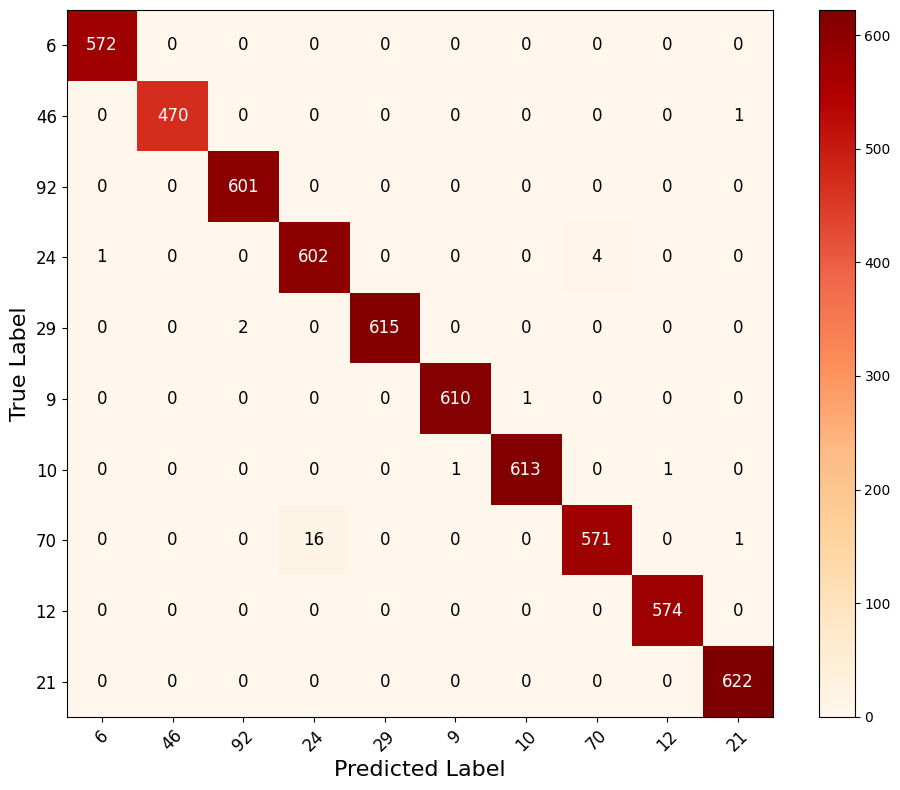

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predictions for test data (argmax for multi-class classification)
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Ensure y_test is in multiclass format (if necessary)
if len(y_test_encoded.shape) > 1 and y_test_encoded.shape[1] > 1:
    y_test = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the total number of classes
num_classes = len(np.unique(y_test))

# Choose the top N most frequent classes to display
top_n = 10  # Adjust the number of classes to display as needed
top_classes = np.argsort(np.bincount(y_test))[-top_n:]

# Create the figure and axis for the confusion matrix plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create the confusion matrix visualization for the top N classes
im = ax.imshow(cm[top_classes][:, top_classes], cmap='OrRd')

# Add colorbar
plt.colorbar(im, ax=ax)

# Set labels for better readability
ax.set_xlabel('Predicted Label', fontsize=16)
ax.set_ylabel('True Label', fontsize=16)

# Show all ticks and labels for the top N classes
tick_marks = np.arange(len(top_classes))
plt.xticks(tick_marks, top_classes, rotation=45, fontsize=12)
plt.yticks(tick_marks, top_classes, fontsize=12)

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(len(top_classes)):
    for j in range(len(top_classes)):
        ax.text(j, i, format(cm[top_classes[i], top_classes[j]], 'd'),
                ha="center", va="center",
                color="white" if cm[top_classes[i], top_classes[j]] > thresh else "black",
                fontsize=12)

# Ensure the plot layout is properly adjusted
plt.tight_layout()

# Show the confusion matrix
plt.show()


# Model Evaluation and Visualizations

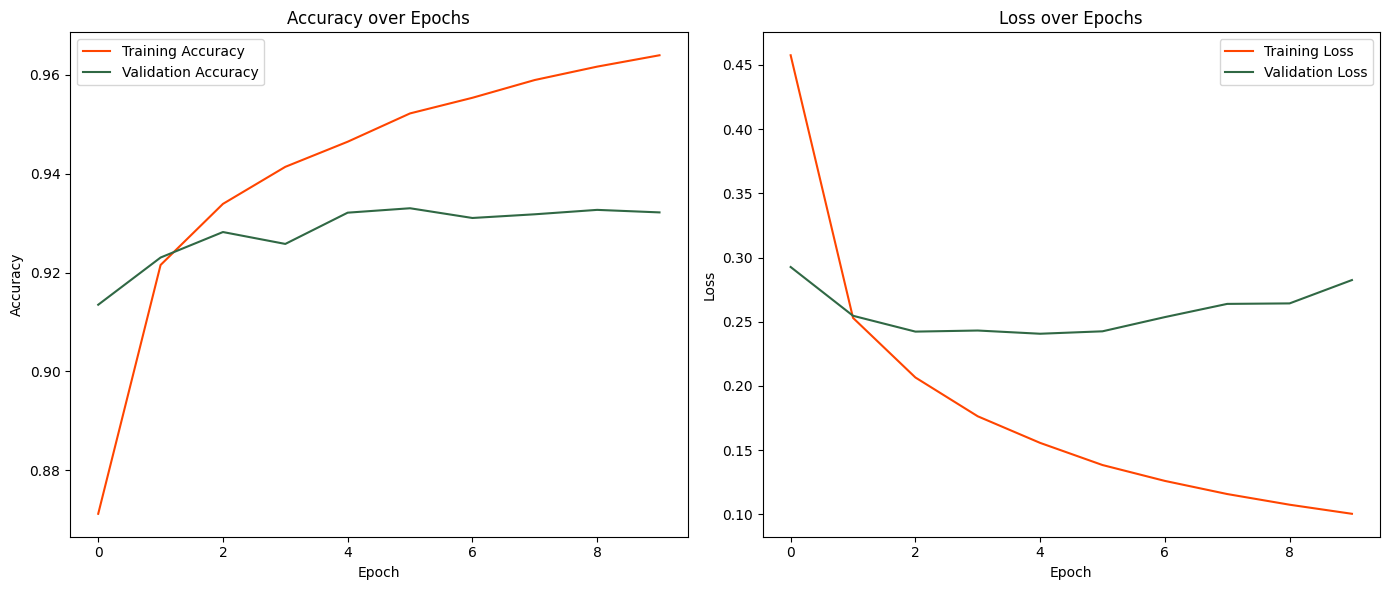

In [15]:
import matplotlib.pyplot as plt


# Create a figure for plotting (adjust figsize as needed)
plt.figure(figsize=(14, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # Create first subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#FF4500')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#306844')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)  # Create second subplot for loss
plt.plot(history.history['loss'], label='Training Loss', color='#FF4500')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#306844')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


# Creating a char_map

In [25]:
char_map = {
    0: '!',
    1: '"',
    2: '#',
    3: '$',
    4: '%',
    5: '&',
    6: "'",
    7: '(',
    8: ')',
    9: '*',
    10: '+',
    11: ',',
    12: '-',
    13: '.',
    14: '/',
    15: '0',
    16: '1',
    17: '2',
    18: '3',
    19: '4',
    20: '5',
    21: '6',
    22: '7',
    23: '8',
    24: '9',
    25: ':',
    26: ';',
    27: '<',
    28: '=',
    29: '>',
    30: '?',
    31: '@',
    32: 'A',
    33: 'B',
    34: 'C',
    35: 'D',
    36: 'E',
    37: 'F',
    38: 'G',
    39: 'H',
    40: 'I',
    41: 'J',
    42: 'K',
    43: 'L',
    44: 'M',
    45: 'N',
    46: 'O',
    47: 'P',
    48: 'Q',
    49: 'R',
    50: 'S',
    51: 'T',
    52: 'U',
    53: 'V',
    54: 'W',
    55: 'X',
    56: 'Y',
    57: 'Z',
    58: '[',
    59: '\\',
    60: ']',
    61: '^',
    62: '_',
    63: '`',
    64: 'a',
    65: 'b',
    66: 'c',
    67: 'd',
    68: 'e',
    69: 'f',
    70: 'g',
    71: 'h',
    72: 'i',
    73: 'j',
    74: 'k',
    75: 'l',
    76: 'm',
    77: 'n',
    78: 'o',
    79: 'p',
    80: 'q',
    81: 'r',
    82: 's',
    83: 't',
    84: 'u',
    85: 'v',
    86: 'w',
    87: 'x',
    88: 'y',
    89: 'z',
    90: '{',
    91: '|',
    92: '}',
    93: '~'
}


1/1 [==============================] - 0s 40ms/step


<ipython-input-26-e82bb15c97ef>:34: UserWarning: Glyph 5 () missing from current font.
  plt.tight_layout()
<ipython-input-26-e82bb15c97ef>:34: UserWarning: Glyph 6 () missing from current font.
  plt.tight_layout()
<ipython-input-26-e82bb15c97ef>:34: UserWarning: Glyph 14 () missing from current font.
  plt.tight_layout()
<ipython-input-26-e82bb15c97ef>:34: UserWarning: Glyph 11 () missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 5 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 14 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools

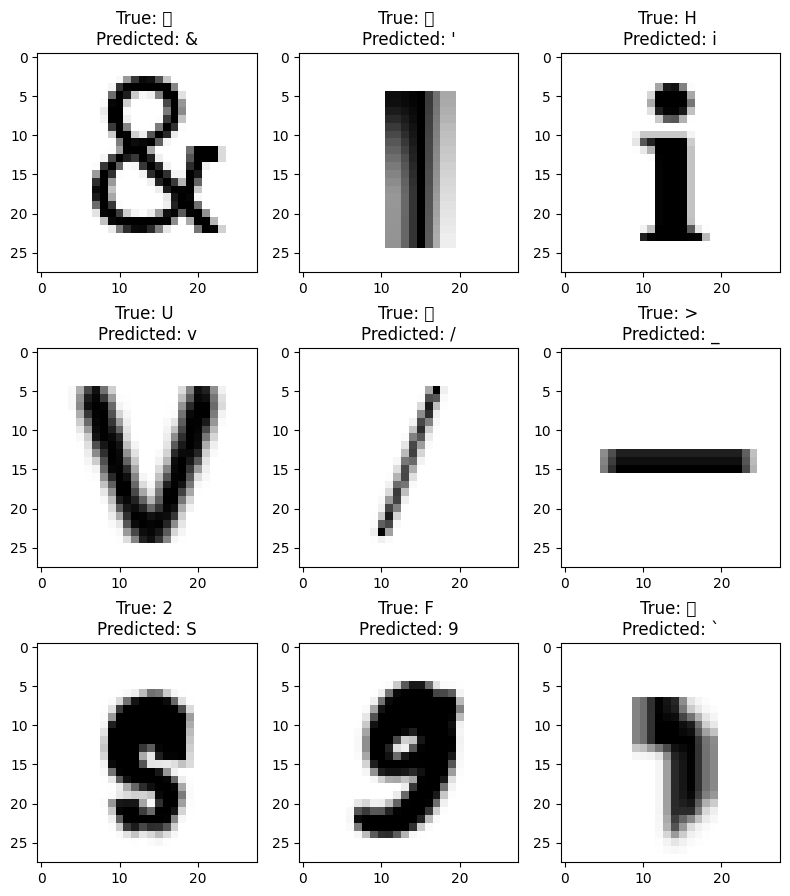

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a character mapping dictionary (char_map)
# where keys are numerical labels (from predictions) and values are characters

# Predicting the characters using the trained model
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Get the image and its corresponding label
    img = np.reshape(X_test[i], (28, 28))  # Reshaping it for displaying
    true_label = np.argmax(y_test[i])  # True label index

    # Check if reshape is necessary based on model's input shape
    if img.shape != (28, 28):
        img_final = np.reshape(img, (1, 28, 28, 1))
    else:
        img_final = img[np.newaxis, :, :, np.newaxis]  # Add extra dimension

    # Predict the label using the model
    pred_label = np.argmax(model.predict(img_final))

    # Use the mapping dictionary to get the actual character
    true_char = chr(int(true_label))  # Assuming true label is encoded as integer for characters
    predicted_char = char_map[pred_label]  # Look up predicted label in the mapping

    # Display the image and prediction
    ax.imshow(img, cmap="Greys")
    ax.set_title("True: {} \nPredicted: {}".format(true_char, predicted_char))
    ax.grid(False)

plt.tight_layout()
plt.show()


# Conclusion


The model demonstrates strong performance on the test set with an accuracy of 93.21%. This suggests that the model has good generalization capabilities. An accuracy of over 90% is typically considered excellent for many practical applications, but whether it's sufficient depends on the specific requirements of the task at hand. The fact that the model achieves this accuracy across a test set confirms its potential effectiveness in a real-world scenario involving TMNIST character recognition.

# References

https://www.kaggle.com/code/agashuthayasuriyan/tmnist-agash-uthayasuriyan

https://www.kaggle.com/code/asawarikadam44/neural-network-type-classification-asawari-kadam#Plotting-Training-loss-and-accuracy

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code



# MIT License

Copyright (c) 2024 Ramprashanth17

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.